# 1. Convergencia de 4 condiciones iniciales

In [38]:
Pkg.add("PyPlot"); #Agregamos la librería PyPlot

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [39]:
using PyPlot;#Declaramos que vamos a usarla

a) Método de Newton

Definimos la funcion

In [40]:
f(x)=x^3-x^2-x-1

f (generic function with 1 method)

Definimos su derivada

In [41]:
df(x)=3*x^2-2*x

df (generic function with 1 method)

Buscamos las raices

In [42]:
function raices(s) 
    list=zeros(Complex64,100); #Definimos una lista de ceros
    x=s; #Tomamos el valor inicial
    for i in 1:100  #El for es para ir guandando el valor de la aproximación en cada entrada de la lista
        
        x=x-f(x)/df(x) #Aplicamos el método de Newtonn
        list[i]=x #Guardamos el valor en la entrada i-ésima de la lista
    end
    return list #La función regresa la lista con 100 entradas
end

raices (generic function with 1 method)

Escogemos 4 valores iniciales y definimos las listas

In [43]:
#Las listas nos regresan los valores que va tomando la aproximación en cada caso
list1=raices(0.5);   
list2=raices(2);
list3=raices(7);
list4=raices(100);

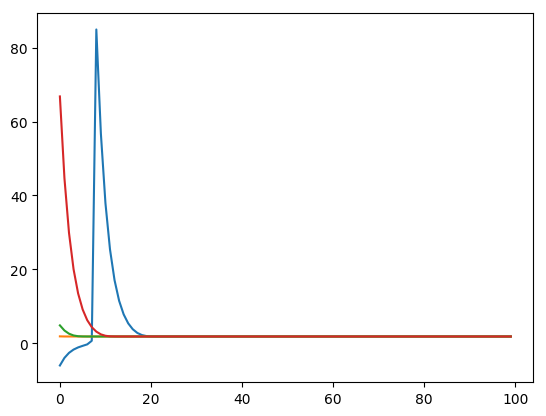

In [44]:
plot(real(list1))
plot(real(list2))
plot(real(list3))
plot(real(list4))
show();

Revisamos que todas las raices converjan al mismo valor

In [27]:
list1[100]==list2[100] #Comparamos la igualdad de la 

true

In [28]:
list2[100]==list3[100]

true

In [29]:
list3[100]==list4[100]

true

Entonces tomamos el valor al que convergen para utilizarlo al momento de calcular los errores.

In [30]:
s=list1[100]

1.8392868f0 + 0.0f0im

Buscamos los errores

In [31]:
e1=(list1-s)/s;
e2=(list2-s)/s;
e3=(list3-s)/s;
e4=(list4-s)/s;

In [32]:
plot(real(e1))
plot(real(e2))
plot(real(e3))
plot(real(e4))
show();

LoadError: [91mUndefVarError: plot not defined[39m

b)Método de bisección

In [45]:
function biseccion(f,a,b)
    p=(a+b)/2;
    list=zeros(Complex64,100);
     for i in 1:100
        if  f(a)*f(p) > 0
            a = p
        end
        
        if f(b)*f(p) > 0
            b = p
        end
        p = (a+b)/2
        list[i]=p
    end
    return list
end;

In [65]:
list5=biseccion(f,-4,9);
list6=biseccion(f,-14,100);
list7=biseccion(f,-44,69);
list8=biseccion(f,-77,5);

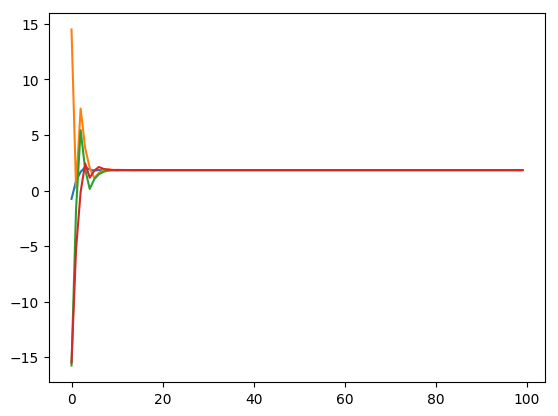

In [66]:
plot(real(list5))
plot(real(list6))
plot(real(list7))
plot(real(list8))
show();


# 2. Método de Newton para funciones arbitrarias

a)Primero veamos la función que toma como argumentos la función, su derivada y una condición inicial; y que regresa una raiz.

In [6]:
function metodo_newton(f,df,x0)
    #Comenzamos tomando nuestra condición inicial
    x=x0;
    #Hacemos el for para aplicar el método de Newton 100 veces
    for i in 1:100
        x=x-f(x)/df(x)
    end
    #La función regresa el último valor de x obtenido
    return x
end

metodo_newton (generic function with 1 method)

Ejemplo:
Tomamos $g(x)=x^2+4x+3$,
cuya derivada es $\frac{d}{dx}g(x)=2x+4$.
Y cuyas raíces sabemos que son $-1$ y $-3$.

In [5]:
#Definimos g
g(x)=x^2+4x+3

g (generic function with 1 method)

In [6]:
#definimos dg
dg(x)=2*x+4

dg (generic function with 1 method)

Probamos el método:

In [9]:
metodo_newton(g,dg,5)

-1.0

In [10]:
metodo_newton(g,dg,-100)

-3.0

b)Hacemos la misma función, pero que esta vez tome un rango amplio de condiciones iniciales.

Con el siguiente ejemplo, veamos que, de hecho, basta llamar a la función anterior pero incluyendo un punto (metodo_newton.(f,df,x))para indicarle a Julia que la última entrada es un arreglo y no un número.

Para ello definimos el siguiente arreglo

In [11]:
#usamos linspace para tomar el intervalo de -20 a 20 y dividirlo en 100 partes
a=linspace(-20,20,100);

Ahora llamamos a la función, utilizando las mismas g y dg del ejemplo anterior.

In [12]:
#El punto es para indicar que e "a" es un arreglo y no un número
metodo_newton.(g,dg,a)

100-element Array{Float64,1}:
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
 -3.0
  ⋮  
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0

Notamos que, en efecto, el _output_ es una arreglo donde las entradas son raices.

c) Creamos la misma rutina, pero que esta vez solo reciba objetos _linspace_.

In [22]:
function metodo_n(f,df,lin)
#Definimos un arreglo vacío
    t=[];
    
#El primer for es para ir tomando cada entrada del argumento lin
    for j in 1:length(lin)
#Tomamos nuestro valor inicial
        x=lin[j];
#El segundo for es para aplicar el método de Newton 200 veces.
        for i in 1:200
        x=x-f(x)/df(x)
        end
        
#El if es para determinar cuando se deben guardar las raices en t (sin repetir)
        
#Para la primera entrada de lin, el valor de la raiz siempre se guarda (para tener un valor inicial con quien comparar)        
        if j==1
#push es para guardar el valor x en en el arreglo t
            push!(t,x)
#Para los siguientes valores, si el valor de x difiere del útlimo número guardado en t (t[length[t]]) por cierta epsilon, entonces signfica que es una raiz diferente y debe guardarse. Para ello usamos push!.
        elseif abs(x-t[length(t)])>0.0005
            push!(t,x)
        end
    end
#Regresamos el el arreglo t
    return t
end

metodo_n (generic function with 1 method)

Ejemplo: Utilizamos las mismas g y dg.

In [23]:
metodo_n(g,dg,a)

2-element Array{Any,1}:
 -3.0
 -1.0

Notamos que, en efecto, nos regresa las únicas dos raíces, sin repetir.

d) Función similar, donde los _inputs_ solo sean la función y la condición inicial.

In [2]:
Pkg.add("SymPy")

INFO: Package SymPy is already installed
INFO: METADATA is out-of-date — you may not have the latest version of SymPy
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [3]:
using SymPy

In [19]:
function newton_r(f,x0)
    z=symbols("z");
    dfs=diff(f(z),z);
    df=lambdify(dfs,[z]);
 #Tomamos nuestra condición inicial
    x=x0;
    #Hacemos el for para aplicar el método de Newton 100 veces
    for i in 1:100
        x=x-f(x)/df(x)
    end
    #La función regresa el último valor de x obtenido
    
    return x
end

newton_r (generic function with 2 methods)

In [20]:
newton_r(g,-55)

-2.9999999999999996